# __LOAN APPROVAL PREDICTION USING MACHINE LEARNING ALGORITHM: A COMPARATIVE STUDY__

### Abstract
A loan is a financial transaction in which one or more individuals, organisations, or other entities lend money to other individuals, organisations, or entities. The recipient (i.e., the borrower) takes on a debt for which he or she is normally accountable for interest payments until the loan is repaid. Banks have various goods to sell in the banking system, but their major source of income is their credit lines. As a result, they can profit from the interest on the loans they credit. Oftentimes, the profit or loss of a bank is mostly determined by loans, i.e., whether consumers repay the loan or default on it. The project's goal is to identify the best algorithm to automate the method, which will save time and energy while improving the efficiency of the process. In terms of loan forecasting, experimental studies revealed that the Random Forest algorithm outperformed other algorithms with higher accuracy.

## Introduction
---

In our banking system, banks sell a variety of products, but credit lines are their primary source of revenue. As a result, they can benefit from the interest on the loans they make. Loans decide whether a bank makes a profit or loses money, i.e., whether customers return the loan or default on it. Just as banks rely on loans to make huge profit, individuals, businesses, and organisations also depend on banks for loans. The purpose of this report is to provide a simple, quick, and straightforward method for selecting suitable applicants. Financial institutions are found in all urban, semi-urban, and rural locations, accord by to this dataset. Customers request for a loan once their creditworthiness has been verified by the firm or bank. The company or bank wants to automate (in real-time) the loan eligibility procedure based on client information provided on the application form.
Furthermore, this area has gotten greater attention and academic interest because of recent advances in data science and some important discoveries in the field of artificial intelligence. It has drawn more attention in recent years to research on loan prediction and credit risk assessment. Due to the current high demand for loans, there is a huge increase in need for additional improvements in credit scoring and loan prediction models. A variety of methodologies have been used to give credit scores to individuals, and much research has been done on the subject throughout the years.
In the dataset, Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and other facts are included to determine eligibility for the loan approval. The SVM, Decision tree, K-nearest neighbour, Logistic regression, Random Forest classifier, and Nave Bayes algorithms were used to forecast loan safety.

## Motivation
---

The purpose of this report is to discuss the use of various machine learning algorithms and suggest the best approach for a financial institution to accurately identify who to lend to and to assist in identifying loan defaulters for significantly reduced credit risk. Six classifiers were utilised to create the model. They'll each be utilised individually to analyse the dataset, find patterns in it, and learn from them. Ultimately, to predict whether a new applicant is likely to default on a loan based on that information.

## Exploring the datasets (EDA)
---

The dataset used in this report is from [Kaggle](https://www.kaggle.com/code/hafidhfikri/loan-approval-prediction/data?select=train_u6lujuX_CVtuZ9i+%281%29.csv/) The system automatically forecast which customer loans it should approve and which it should reject based on the loan dataset. As an input, the system will take a loan application form. To be processed, a properly formatted application form should be provided as an input. Output 1 shows the attributes that are considered before a loan is approve. 

In [ ]:
#Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing
# load Dataset 
loan_df = pd.read_csv("/Users/oluwakemifarinde/Downloads/All MA336/Project/Loan Pred. Train.csv")
loan_df.head() #view the top 5 information

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


There are 13 variables in the dataframe. The attibutes are explained below;

| Attributes       | Description             |
|------------------|-------------------------|
|   Gender         | Male/Female             |
|Married           | Yes/No                  |
|Self_Employed     | Yes/No                  |
|Credit_History    | Meets Guidelines or Not |
|Loan_Status       | Loan Approved or Not    |
|Dependents        | Number of Dependents    |
|Education         | Graduate/Under-Graduate |
|Property_Area     | Urban/Semi-Urban/Rural  |
|ApplicantIncome   | Applicant’s Income      |
|CoapplicantIncome | Co-Applicant’s Income   |
|LoanAmount        | Loan Amount in Thousands|
|Loan_Amount_Term  | Term of Loan in Months  |

#### Statistical Analysis - Continuos Variables

In [ ]:
loan_df.describe() #statistical analysis

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The statistical analysis demonstrates that the maximum Applicant income is **81,000** and **41,667** for Coapplicant income. The maximum loan amount requested is **700**.

Also, it demonstrates that there are 614 cases with are missing values. With 22 missing values in Loan Amount, the column's median was used to fill in the gaps. There were 50 missing values in Credit History, as well as 14 missing values in Loan Amount Term. These values were filled by taking the mode of the columns and replacing the impacted rows. 

Before that, lets take a look at missing values in the whole dataset.

In [ ]:
loan_df.isnull().sum() #Show total missing values of each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender has 13 missing values. Married has 3 missing values, Dependents has 15 missing values, Self Employed is missing 32 values as well as the previously missing values. 

There are several ways of dealing with missing values which includes dropping rows, however we are going with filling and replace method with mode or median.

#### Data Cleaning

In [ ]:
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace=True)
loan_df['Married'].fillna(loan_df['Married'].mode()[0], inplace=True)
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0], inplace=True)
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0], inplace=True)
loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].median(), inplace=True)
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0], inplace=True)
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0], inplace=True)
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_df.isnull().sum() #0 missing values again

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#Removed Loan ID since it has no use on the analysis
loan_df.drop('Loan_ID',axis=1,inplace=True)

#### Visualize data information

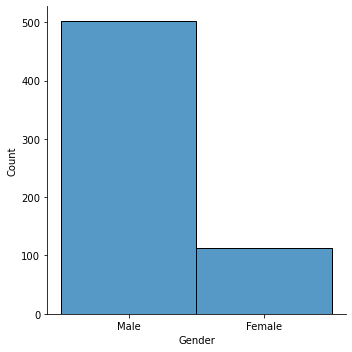

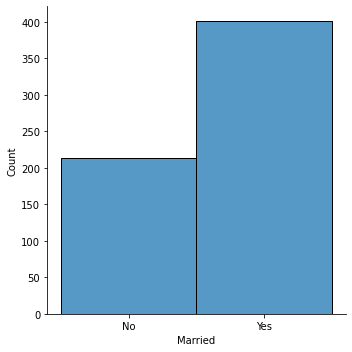

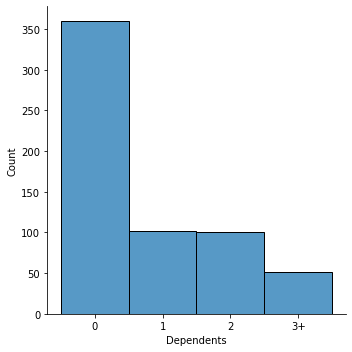

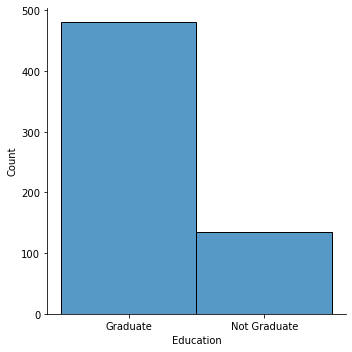

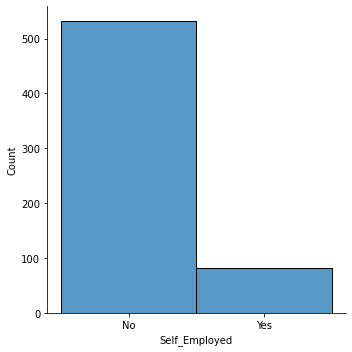

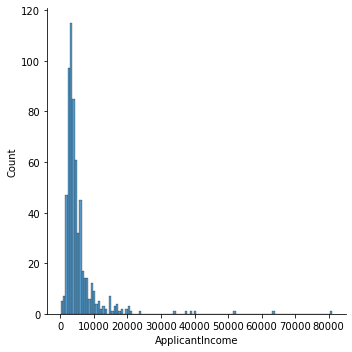

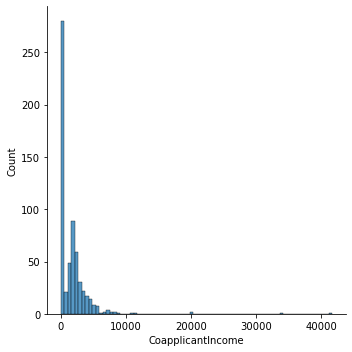

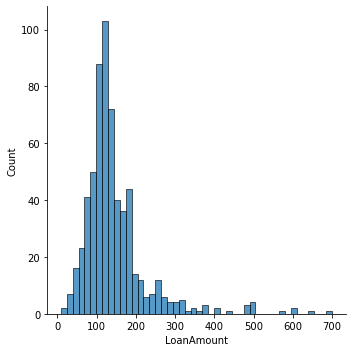

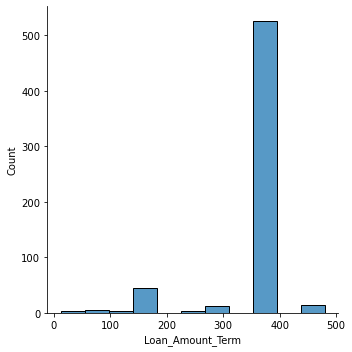

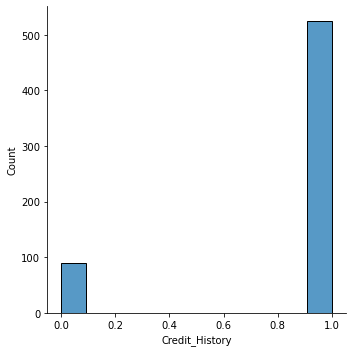

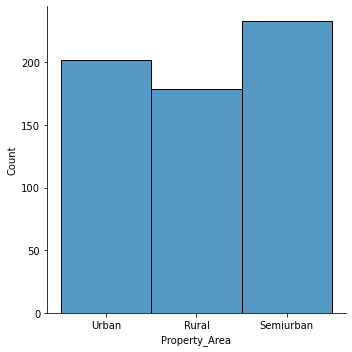

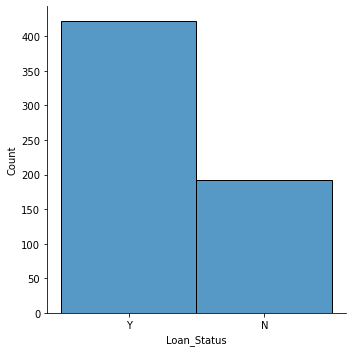

In [ ]:
#import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
#visualize dataset features
for _ ,column in enumerate(loan_df.columns):
    sns.displot(loan_df[column], palette="Paired")

#### Observations from the plot above shows the following
1. **Sex**: Men outnumber women by a factor of two (approx. 3x)
1. **Marital Status**: Married applicants are more likely to be given loans; 2/3 of the population in the dataset is married.
1. **Dependents**: The vast majority of the population has no dependents and is therefore more likely to be approved for a loan.
1. **Education**: About 5/6th of the population is educated, and graduates have a higher chance of getting a loan.
1. **Employment**: 5/6th of the population does not work for themselves.
1. **Loan Amount Term**: The vast majority of loans are for 360 months (30 years)
1. **Credit History**: Applicants with a good credit history have a far better chance of being accepted.
1. **Property Area**: Semi-urban candidates are more likely to be approved for loans.
1. **Loan Approval Status**: Approximately two-thirds of applicants have been approved for a loan.

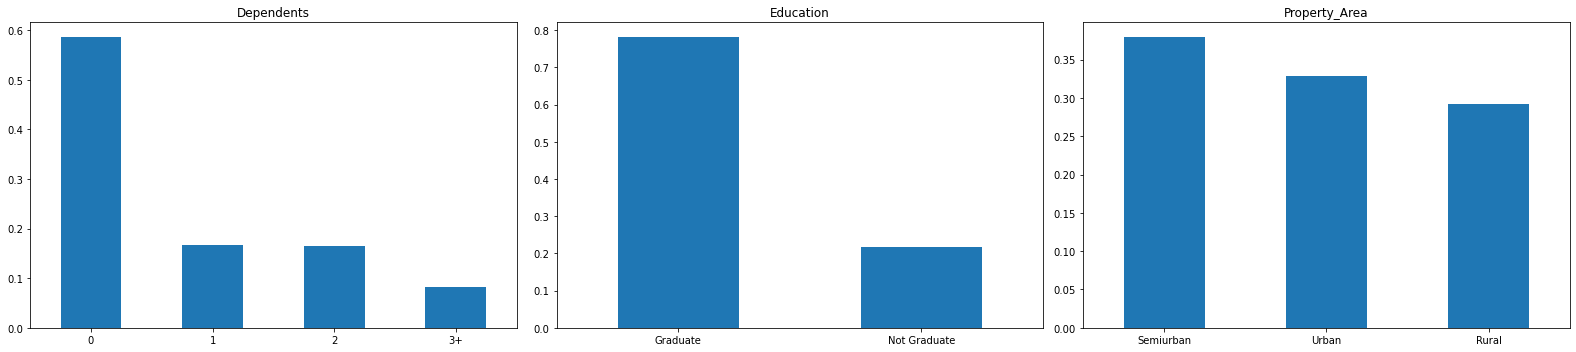

In [ ]:
#Visualise loan details according to Dependents, Education and Property Area
fig2, ax2= plt.subplots(1,3) #Visualise 3 charts on a row
loan_df['Dependents'].value_counts(normalize=True).plot(figsize=(22,5),ax=ax2[0],kind='bar',title= 'Dependents',rot=0)
loan_df['Education'].value_counts(normalize=True).plot(ax=ax2[1],kind='bar',title= 'Education',rot=0)
loan_df['Property_Area'].value_counts(normalize=True).plot(ax=ax2[2],kind='bar',title= 'Property_Area',rot=0)
fig2.tight_layout()
#58% of the applicants have no dependent
# 78% of the applicants are graduates
# majority of the applicants are from the semi-urban area.

#### Dummy Variables
A dummy variable is a numeric variable that reflects the categorical variables of the dataset's sub-categories or sub-groups.

In a nutshell, a dummy variable allows us to distinguish between distinct sub-groups of data while also allowing us to use the data for regression analysis.

In [ ]:
#to make dummy variables since there are not more than 3 categories
from sklearn.preprocessing import LabelEncoder
cols=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']
le=LabelEncoder()
for col in cols:
    loan_df[col]=le.fit_transform(loan_df[col])

In [ ]:
#Create new column to split property area for better result
loan_df["Rural_Area"]= np.where(loan_df["Property_Area"] == 0, 1,0) #where property area is 0, give 1 else 0
loan_df["Urban_Area"]= np.where(loan_df["Property_Area"] == 2, 1,0) #where property area is 2, give 1 else 0
loan_df["Semiurban_Area"]= np.where(loan_df["Property_Area"] == 1, 1,0) #where property area is 1, give 1 else 0
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rural_Area,Urban_Area,Semiurban_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,0,1,0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,0,1,0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,0,1,0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,1,0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,1,0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,0,1,0
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,0,1,0


Gender and Education should be splitted to have a better respresentation. Such as male gender column and female gender column.

In [ ]:
#create ne column to split gender
loan_df["Female_Gender"]= np.where(loan_df["Gender"] == 0, 1,0) #where gender is 0, give 1 else 0
loan_df["Male_Gender"]= np.where(loan_df["Gender"] == 1, 1,0) #where gender is 1, give 1 else 0
loan_df["Education"]= np.where(loan_df["Education"] == 0, 1,0) #Educated as 1, not educated as 0
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rural_Area,Urban_Area,Semiurban_Area,Female_Gender,Male_Gender
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,0,1,0,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0,0,1
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,0,1,0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,0,1,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,1,0,0,1,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,1,0,0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,0,1,0,0,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,0,1,0,0,1


In [ ]:
#Now remove Property Area and Gender
loan_df1=loan_df.drop('Property_Area',axis=1)
loan_df=loan_df1.drop('Gender',axis=1)

#### Correlation
Checked correlation to see the relationship between Loan Status and the remaining variables.
The result can be interpreted as;
A correlation of 0.9 to 1 shows a very strong relationship.
A strong correlation is defined as 0.7 to 0.9 positive or negative.
A moderate correlation is defined as a positive or negative correlation of 0.5 to 0.7.
A weak correlation is defined as a positive or negative correlation of 0.3 to 0.5.
A insignificant correlation is defined as a positive or negative correlation of 0 to 0.3.

In [ ]:
# Most correlated values is: 1) Credit_History 2) Semiurban_Area 3) Rural Area
corr_train = loan_df.corr()
corr_train['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Semiurban_Area       0.136540
Married              0.091478
Male_Gender          0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Female_Gender       -0.017987
Loan_Amount_Term    -0.022549
LoanAmount          -0.033214
Urban_Area          -0.043621
CoapplicantIncome   -0.059187
Education           -0.085884
Rural_Area          -0.100694
Name: Loan_Status, dtype: float64

<AxesSubplot:>

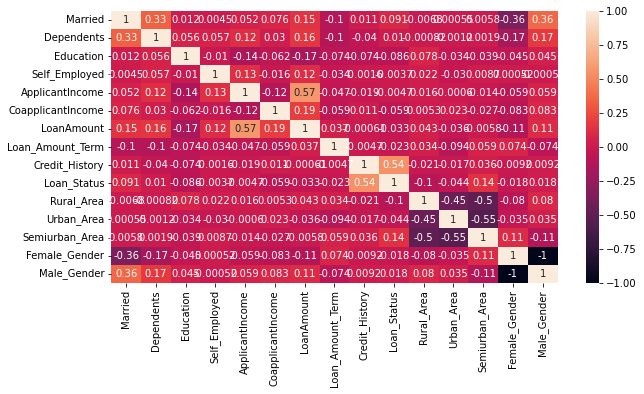

In [ ]:
#visualise correlation
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(corr_train, annot = True)

## Methodology
---
#### Training and Testing
A dataset is often divided into a training set and a testing set, with most of the data utilised for training and a lesser number for testing. The system produces a prediction against the test set after processing the training set. The dataset was first broken into two parts: 70% for training and 30% for testing the model. The accuracy of six algorithms was then compared to find a better and more accurate algorithm.

In [ ]:
X = loan_df.drop(columns=['Loan_Status'], axis=1) #Use all features as predictor except Loan status
y = loan_df['Loan_Status'] #target variable
#make data balanced
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
SMOTENN = SMOTEENN()
X,y = SMOTENN.fit_resample(X,y)
#ros = RandomOverSampler (random_state = 42)
#X, y = ros.fit_resample(X,y)

In [ ]:
#Split train=70% and test=30% of our data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Import scalar to tranform data into scale data for 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Scaling X
X_train_scaled = sc.fit_transform(x_train)
X_test_scaled = sc.fit_transform(x_test)
# Import accuracy metrics to check the accuracy of each prediction
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report, roc_curve

#### Confusion Matrix
A confusion matrix is a summary of classification problem prediction outcomes.

The number of right and incorrect predictions is broken down by class and summarised with count values.

“true positive” for correctly predicted event values.
“false positive” for incorrectly predicted event values.
“true negative” for correctly predicted no-event values.
“false negative” for incorrectly predicted no-event values.

#### Model Used
**Logistic Regression**: The Python Scikit-learn module provided the Logistic Regression model. Logistic Regression is a statistical model and a classification algorithm. Given a set of independent variables, it is used to predict a binary outcome (1/0, Yes/No, True/False). In this case, it was used to predict the eligibility of customers loan status. If yes or no request for loan will be granted. All variables were evaluated in this report.

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        40
           1       0.76      1.00      0.86        38

    accuracy                           0.85        78
   macro avg       0.88      0.85      0.84        78
weighted avg       0.88      0.85      0.84        78

Accuracy Score of Logistic Regression:  0.8461538461538461


<AxesSubplot:>

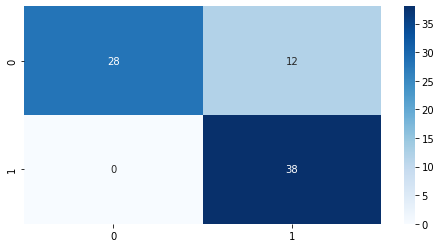

In [ ]:
#Import LogisticRegression 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train) #to learn and store the dataset
logreg_pred = logreg.predict(X_test_scaled) # predict loan status for test data set
print(classification_report(y_test, logreg_pred)) #print classification report
LR_SC = accuracy_score(logreg_pred,y_test)
print('Accuracy Score of Logistic Regression: ', accuracy_score(y_test, logreg_pred)) #print accuracy score
matrix4=confusion_matrix(y_test, logreg_pred) #confusion matrix
plt.figure(figsize = (8,4))
sns.heatmap(matrix4 , annot = True, cmap="Blues") #visualise confusion matrix

The accuracy score using logistic regression is 85%. 
On the vertical axis of the matrix represents the actual axis and the horizontal represents the predicted axis. '0' means Negative and '1' means positive.
Hence,
1. 00- True Negative = 28
1. 01- False Positive = 12
1. 10- False Negative = 0
1. 11- True Positive = 38

**K- Nearest Neighbour**:  The k-Nearest Neighbours algorithm, sometimes known as KNN, is a straightforward method. It is possible to save the whole training dataset. When making a prediction, the k-most comparable records to a new record from the training dataset are found. A summary prediction is created based on these neighbours. The summary forecast can be made by returning the most common outcome or taking the average once the neighbours have been located. As a result, KNN can be utilised to solve problems involving classification or regression. To make a prediction, all variables were considered.

              precision    recall  f1-score   support

           0       0.83      0.72      0.77        40
           1       0.74      0.84      0.79        38

    accuracy                           0.78        78
   macro avg       0.79      0.78      0.78        78
weighted avg       0.79      0.78      0.78        78

Accuracy_Score of KNeighbors Classifier:  0.782051282051282


<AxesSubplot:>

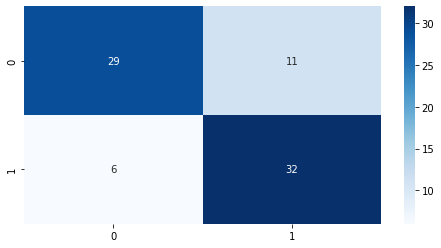

In [ ]:
#Test the algorithm on the test dataset for prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled,y_train) #to learn and store the dataset
knn_pred = knn.predict(X_test_scaled) # predict loan status for test data set
print(classification_report(y_test, knn_pred)) #print classification report
KN_SC = accuracy_score(knn_pred,y_test)
print('Accuracy_Score of KNeighbors Classifier: ', accuracy_score(y_test, knn_pred)) #print accuracy score
matrix1=confusion_matrix(y_test, knn_pred) #confusion matrix
plt.figure(figsize = (8,4))
sns.heatmap(matrix1 , annot = True, cmap="Blues") #visualise confusion matrix

The accuracy score using KNN is **78%**. 

**Support Vector Machine**: The "Support Vector Machine" (SVM) is a supervised machine learning algorithm that can be used for classification and regression tasks. It is, however, mostly used in classification problems. Each data item in the SVM algorithm is plotted as a point in n-dimensional space (where n is the number of features you have), with the value of each feature being the value of a specific coordinate.


              precision    recall  f1-score   support

           0       1.00      0.75      0.86        40
           1       0.79      1.00      0.88        38

    accuracy                           0.87        78
   macro avg       0.90      0.88      0.87        78
weighted avg       0.90      0.87      0.87        78

Accuracy Score of Super Vector Machine:  0.8717948717948718


<AxesSubplot:>

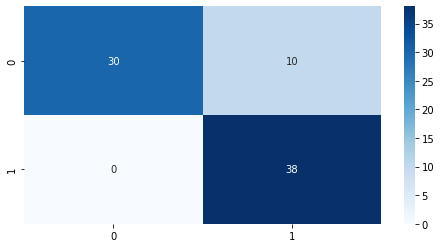

In [ ]:
#import SVC
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
print(classification_report(y_test, svm_pred))
SVM_SC = accuracy_score(svm_pred,y_test)
print('Accuracy Score of Super Vector Machine: ', accuracy_score(y_test, svm_pred))
matrix6=confusion_matrix(y_test, svm_pred)
plt.figure(figsize = (8,4))
sns.heatmap(matrix6 , annot = True, cmap="Blues")

The accuracy score using SVM is **87%**. 

**Decision Trees**: Decision trees, like the methods previously discussed, are a non- parametric supervised learning method for classification and regression. The goal is to learn simple decision rules from data attributes to develop a model that predicts the value of a target variable. The initial step was to use Scikit-Learn to import the relevant libraries and construct a variable for the decision tree classifier. The data is subsequently fitted to train the decision tree model, which is then used to predict the test data.

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        40
           1       0.83      0.76      0.79        38

    accuracy                           0.81        78
   macro avg       0.81      0.81      0.81        78
weighted avg       0.81      0.81      0.81        78

Accuracy_Score of Decision Tree:  0.8076923076923077


<AxesSubplot:>

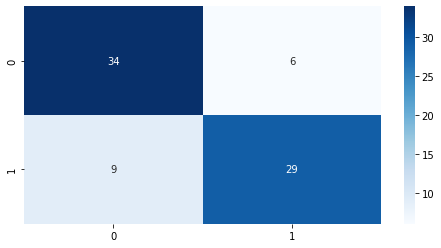

In [ ]:
#Import Decision tree classifier with tree depth of 11
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion= 'gini',max_depth=11 , random_state=42)
dtfit = dt.fit(X_train_scaled,y_train)
dt_pred = dt.predict(X_test_scaled)
print(classification_report(y_test, dt_pred))
DT_SC = accuracy_score(dt_pred,y_test)
print('Accuracy_Score of Decision Tree: ', accuracy_score(y_test, dt_pred))
matrix2=confusion_matrix(y_test, dt_pred)
plt.figure(figsize = (8,4))
sns.heatmap(matrix2 , annot = True, cmap="Blues")

The accuracy score using DTC is **81%**. 

**Random Forest**: Random Forest is a supervised machine learning algorithm that is commonly used to solve classification and regression problems. It creates decision trees from various samples, using the majority vote for classification and the average for regression. The first thing done was the use Scikit-Learn library to load the relevant libraries and construct a variable for the random forest classifier. The data was then fitted using the classifier's fit function, followed by prediction on the test data.

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        40
           1       0.88      0.97      0.93        38

    accuracy                           0.92        78
   macro avg       0.93      0.92      0.92        78
weighted avg       0.93      0.92      0.92        78

Accuracy Score of Random Forest Classifier:  0.9230769230769231


<AxesSubplot:>

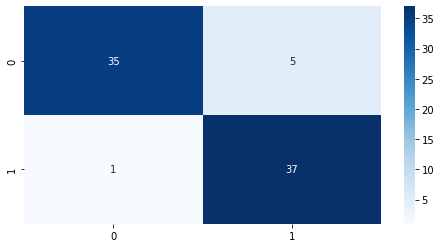

In [ ]:
#Import RFC
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train)
RF_pred = RF.predict(X_test_scaled)
print(classification_report(y_test, RF_pred))
RF_SC = accuracy_score(RF_pred,y_test)
print('Accuracy Score of Random Forest Classifier: ', accuracy_score(y_test, RF_pred))
matrix3=confusion_matrix(y_test, RF_pred)
plt.figure(figsize = (8,4))
sns.heatmap(matrix3 , annot = True, cmap="Blues")

The accuracy score using RFC is **92%**. 

**Naïve Bayes**: It's a classification method based on Bayes' Theorem and the assumption of predictor independence. A Naive Bayes classifier, in simple terms, posits that the existence of one feature in a class is unrelated to the presence of any other feature.

              precision    recall  f1-score   support

           0       0.70      0.95      0.81        40
           1       0.92      0.58      0.71        38

    accuracy                           0.77        78
   macro avg       0.81      0.76      0.76        78
weighted avg       0.81      0.77      0.76        78

Accuracy Score of NB:  0.7692307692307693


<AxesSubplot:>

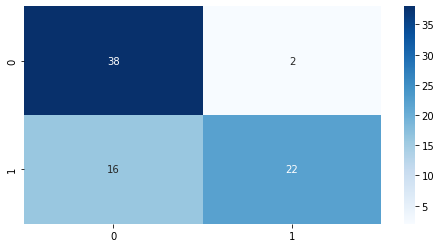

In [ ]:
#Import GaussianNB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)
Nb_SC = accuracy_score(y_test, y_pred_nb)
print(classification_report(y_test, y_pred_nb))
print('Accuracy Score of NB: ', accuracy_score(y_pred_nb,y_test))
matrix7=confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize = (8,4))
sns.heatmap(matrix7 , annot = True, cmap="Blues")

The accuracy score using Naive Bayees is **77%**. 

## Results
---
A model was developed for loan prediction and credit risk assessment using six machine learning algorithms: Random Forest, Support Vector Machine, Logistic Regression, K-Nearest Neighbours, Naive Bayes, and Decision Trees. To have a better grasp of the accuracy and other scores of the models, the results of all the models are provided below.

In [ ]:
#Tabulate accuracy in descending order
score = [DT_SC,RF_SC,LR_SC , SVM_SC , KN_SC, Nb_SC]
Models = pd.DataFrame({
    'Algorithms': ["Decision Tree","Random Forest", "Logistic Regression" , "SVM" , "KNeighborsClassifier", "Naive Bayes"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Algorithms,Score
1,Random Forest,0.923077
3,SVM,0.871795
2,Logistic Regression,0.846154
0,Decision Tree,0.807692
4,KNeighborsClassifier,0.782051
5,Naive Bayes,0.769231


#### Comparison Analysis
All algorithms has proven to be a good approach, Naïve Bayes appears to be the least choice for this modelling. The above shows accuracy of each algorithm considering all variables to be predictors.

#### Suggested Signignificat Variables 

In [ ]:
#Check statistical significant variables. i.e. p < 0.05 . 1) Self Employed  2) Loan Amount Term 3) Credit History 
#4) Rural Area 5) Urban Area 6) Semi Urban Area 7) Married 8) Applicant Income and 9)CoApplicant Income
import statsmodels.api as sm
logit_model=sm.Logit(y,X) #where y = target variable, Loan Status
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.382883
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.447     
Dependent Variable: Loan_Status      AIC:              225.5677  
Date:               2022-04-13 12:45 BIC:              275.3092  
No. Observations:   258              Log-Likelihood:   -98.784   
Df Model:           13               LL-Null:          -178.76   
Df Residuals:       244              LLR p-value:      2.0114e-27
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Married            0.9630   0.4345  2.2164 0.0267  0.1114  1.8146
Dependents        -0.2945   0.2159 -1.3643 0.1725 -0.7176  0.1286


The p-value linked with the value in the z value column is represented by the Pr(>|z|) column. The predictor variable has a statistically significant association with the responder variable in the model if the p-value is less than a specific significance level (e.g. =. 05). From the above output, Self Employed, Loan Amount Term, Credit History, Rural Area, Urban Area, Semi Urban Area, Married, Applicant Income and CoApplicant Income have proven to be statistically significant.

## Conclusion
---
The goal of this work was to investigate, analyse, design, and propose the best machine learning algorithm for correctly identifying whether a person has a high probability of defaulting on a loan based on certain characteristics.
As a result, it can be confidently inferred that the Random Forest model is incredibly efficient with 92% accuracy, produces superior results than other models. It functions properly and meets all banker standards. This system calculates the outcome correctly and precisely. As seen on the confusion matrix, it accurately predicts whether a loan will be approved or rejected for a loan application or consumer. Naïve Bayes on the other hand with 77% accuracy has performed low and therefore should not be prioritised.

## References
---
1. Learning Approachǁ, IOSR Journal of Computer Engineering (IOSR-JCE), Vol. 18, Issue 3, pp. 79-81, Ver. I (May-Jun. 2016).
1. “Loan Prediction using Decision Tree and Random Forest”Author- Kshitiz Gautam, Arun Pratap Singh, Keshav Tyagi, Mr. Suresh Kumar Year-2020.
1. Zhu L, Qiu D, Ergu D, Ying C and Liu K 2019 A study on predicting loan default based on the random forest algorithm The 7th Int. Conf. on Information Technol. and Quantitative Management (ITQM) 162 pp 503–13 .
1. Turkson, Regina Esi, Edward Yeallakuor Baagyere, and Gideon Evans Wenya. "A machine learning approach for predicting bank credit worthiness." 2016 Third International Conference on Artificial Intelligence and Pattern Recognition (AIPR). IEEE, 2016.
1. Supriya P, Pavani M, Saisushma N, Kumari N V and Vikas K 2019 Loan prediction by using machine learning models Int. Journal of Engineering and Techniques 5 pp144–8
1. Shoumo S Z H, Dhruba M I M, Hossain S, Ghani N H, Arif H and Islam S 2019 Application of machine learning in credit risk assessment: a prelude to smart banking TENCON 2019 – 2019 IEEE Region 10 Conf. (TENCON) pp 2023–8 .
1. Addo P M, Guegan D and Hassani B 2018 Credit risk analysis using machine and deep learning models Risks 6 p 38.
1. https://www.kaggle.com/code/ajaymanwani/loan-approval-prediction/notebook

---
<div style="text-align: right ;font-size: small; color: gray"> Notebook by <a Student ID 2100793 </a> Oluwakemi Elizabeth Farinde - Student ID 2100793</a>, Student in Applied Data Science at the University of Essex 